<a href="https://colab.research.google.com/github/raquel-maia/python-dados/blob/main/AN%C3%81LISE_EXPLORAT%C3%93RIA_DATA_ANALYTCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydataset --quiet #instalar biblioteca


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 64.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import pandas as pd


In [ ]:
import numpy as np

In [ ]:
import seaborn as sns #visualização de dados

In [ ]:
import matplotlib.pyplot as plt #visualização de dados

In [ ]:
import scipy.stats as stat #biblioteca para estatística

In [ ]:
from pydataset import data #para leitura de dados

initiated datasets repo at: /root/.pydataset/


In [ ]:
forbes = data('Forbes2000')

In [ ]:
forbes.head() #leitura das 5 primeiras linhas

,rank,name,country,category,sales,profits,assets,marketvalue
1,1,Citigroup,United States,Banking,94.71,17.85,1264.03,255.30
2,2,General Electric,United States,Conglomerates,134.19,15.59,626.93,328.54
3,3,American Intl Group,United States,Insurance,76.66,6.46,647.66,194.87
4,4,ExxonMobil,United States,Oil & gas operations,222.88,20.96,166.99,277.02
5,5,BP,United Kingdom,Oil & gas operations,232.57,10.27,177.57,173.54


Primeiro Passo -> Olhar os Tipos de variáveis

In [ ]:
forbes.info()#verificando quais colunas são númerias e quais categóricas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         2000 non-null   int64  
 1   name         2000 non-null   object 
 2   country      2000 non-null   object 
 3   category     2000 non-null   object 
 4   sales        2000 non-null   float64
 5   profits      1995 non-null   float64
 6   assets       2000 non-null   float64
 7   marketvalue  2000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 140.6+ KB


No caso acima, as colunas denotadas por "Object" são categóricas, já as colunas inte64 assumem valores inteiros e as colunas float64 sao numéricas contínuas

# **Análise de tendencia central**

In [ ]:
forbes.iloc[:, 2:8].mode() #o iloc filtra o dataframe de modo que pegue todas as linhas e pegue a segunda coluna ate o 8 essa e a função mode (a moda) df.mode()

,country,category,sales,profits,assets,marketvalue
0,United States,Banking,0.58,0.13,4.22,1.34


In [ ]:
#Media e Mediana

In [ ]:
forbes[['sales', 'profits', 'assets', 'marketvalue' ]].mean()

sales           9.697010
profits         0.381133
assets         34.041850
marketvalue    11.877655
dtype: float64

In [ ]:
forbes[['sales', 'profits', 'assets', 'marketvalue' ]].median() #presença de outlear muda os valores comparado a media

sales          4.365
profits        0.200
assets         9.345
marketvalue    5.150
dtype: float64

A função describe calcula estatícas descritivas das variáveis numpericas

In [ ]:
forbes.describe()

,rank,sales,profits,assets,marketvalue
count,2000.000000,2000.000000,1995.000000,2000.000000,2000.000000
mean,1000.500000,9.697010,0.381133,34.041850,11.877655
std,577.494589,18.002592,1.765454,99.678786,24.460197
min,1.000000,0.010000,-25.830000,0.270000,0.020000
25%,500.750000,2.017500,0.080000,4.025000,2.720000
50%,1000.500000,4.365000,0.200000,9.345000,5.150000
75%,1500.250000,9.547500,0.440000,22.792500,10.602500
max,2000.000000,256.330000,20.960000,1264.030000,328.540000


Nesse caso temos o count, media, desvio padrão (std), min, o primeiro quartil (25%) mediana (50%) terceiro quartil 75% e o máximo.

Amplitude, desvio padrão e variância

In [ ]:
#essa funcao: adiciona no describe anterior as colunas de amplitude e a variância
#a amplitude será o maximo - minimo valor
# a variancia será o desvio padrão ao quadrado
def describe_new(df):
  df1 = df.describe()
  df1.loc["amplitude"] = df1.loc['max'] - df1.loc['min']
  df1.loc["variancia"] = df1.loc['std'] * df1.loc['std']
  return df1

In [ ]:
describe_new(forbes)

,rank,sales,profits,assets,marketvalue
count,2000.000000,2000.000000,1995.000000,2000.000000,2000.000000
mean,1000.500000,9.697010,0.381133,34.041850,11.877655
std,577.494589,18.002592,1.765454,99.678786,24.460197
min,1.000000,0.010000,-25.830000,0.270000,0.020000
25%,500.750000,2.017500,0.080000,4.025000,2.720000
50%,1000.500000,4.365000,0.200000,9.345000,5.150000
75%,1500.250000,9.547500,0.440000,22.792500,10.602500
max,2000.000000,256.330000,20.960000,1264.030000,328.540000
amplitude,1999.000000,256.320000,46.790000,1263.760000,328.520000
variancia,333500.000000,324.093331,3.116828,9935.860339,598.301217


A maior amplitude ou descrepancia das empresas listadas na forbes 2000 é relacionada aos ativos da empresa, os assests, conforme podemos ver. Essa também é a varável com maior desvio padrão.(não iremos considerar a varável ranking, pois nesse caso ela sera como o nosso ID da empresa)

# HISTOGRAMA DAS **VARIÁVEIS**

<Figure size 800x1000 with 0 Axes>

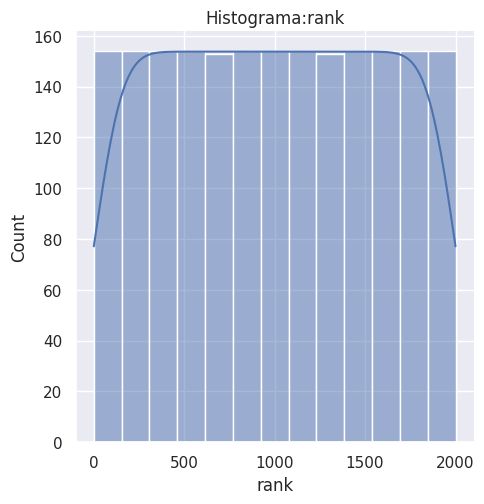

<Figure size 800x1000 with 0 Axes>

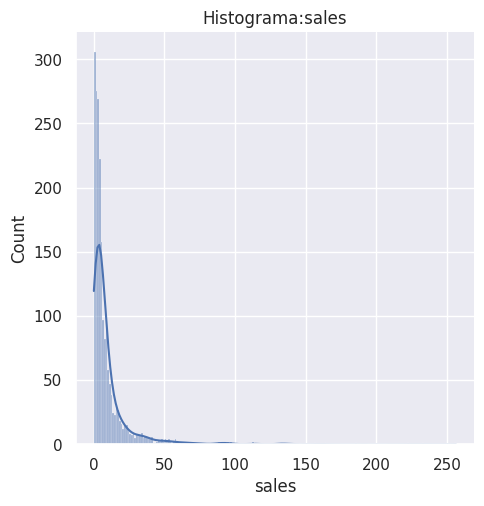

<Figure size 800x1000 with 0 Axes>

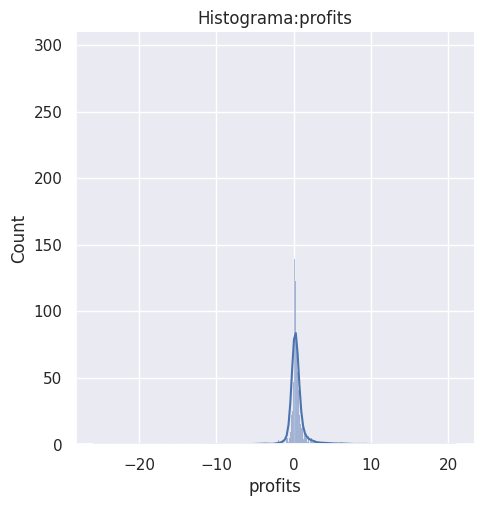

<Figure size 800x1000 with 0 Axes>

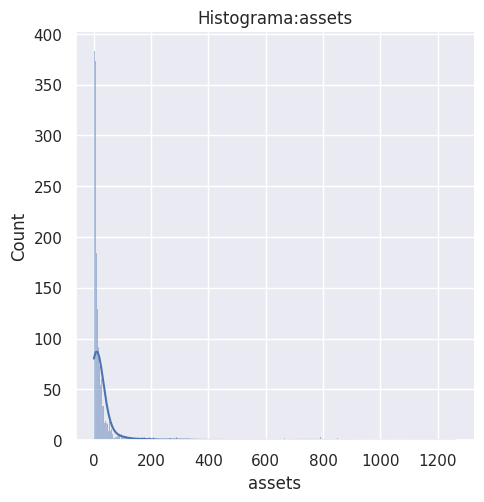

<Figure size 800x1000 with 0 Axes>

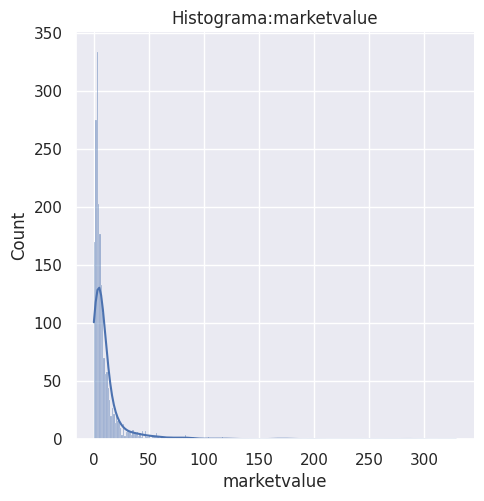

In [ ]:
plt.rcParams['figure.figsize'] = [8 ,10]
sns.set_theme()
#creat distplots
for column in forbes.select_dtypes(include=np.number).columns:
  plt.figure()
  sns.displot(data = forbes, x = column, kde = True) #kde true significa curva de densidade
  plt.title("Histograma:" +column)

# Boxplot das variáveis

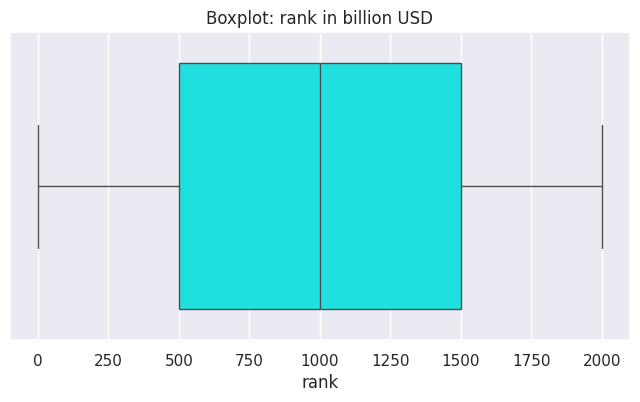

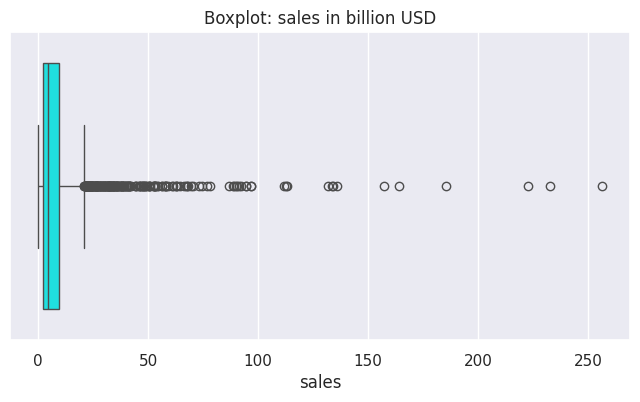

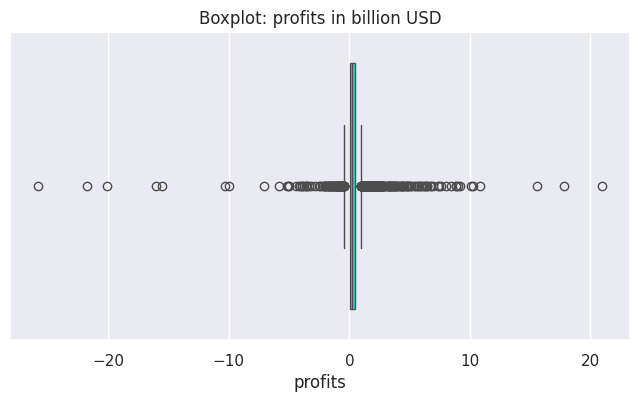

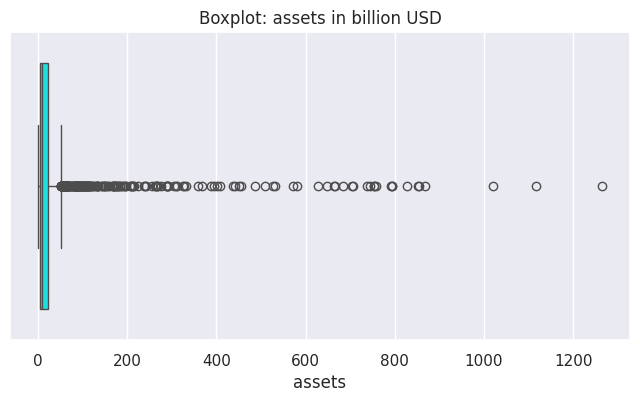

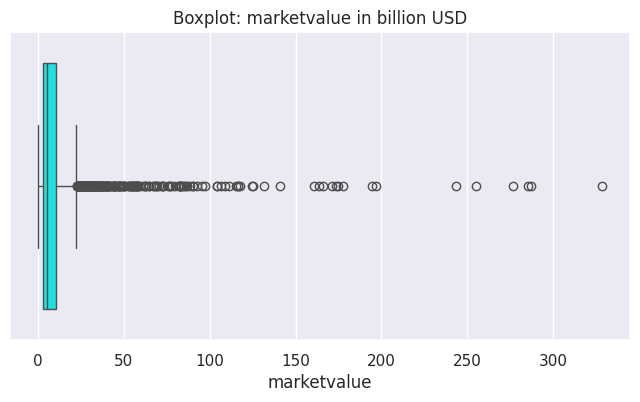

In [ ]:
plt.rcParams['figure.figsize'] = [8 ,4]
sns.set_theme()
#PARA CADA UMA DAS COLUNAS NUMERICAS RODA O BOXPLOT
for column in forbes.select_dtypes(include=np.number).columns:
  plt.figure()
  sns.boxplot(data = forbes, x = column, color = 'cyan', showfliers=True) #showfliers ela é a opção que define se vai mostrar otlier ou não
  plt.title("Boxplot: "+column + " in billion USD")

pelos box plot podemos ver a grande concenrtração de empresas como :
 - Vendas proximas a 2-9 bilhoes
 - Lucro Oscilando proximo a 0(0.1 a 0.5 bilhoes) com valores positivos e negativos mas caldas
 - Assests(ativos) de 5  a 25 bilhoes
 - Valor de Mercado proximo a 3-11 bilhoes

 Vamos agora analisar as outliers encontradas

# Outliers das variáveis

Método Z score

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats ## pacote de estatística que contém a função z score

In [ ]:


def find_outlier_zscore(dataset, threshold, colname):
    # Função que calcula a quantidade de outliers encontrados dado o nome do dataframe, o threshold e o nome da coluna
    df = dataset[colname]
    outliers = []
    zscore = []
    threshold = threshold
    mean = np.mean(df)
    std = np.std(df)
    for i in df.values:
        z_score = (i - mean) / std
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    print("Número de outliers encontrados em {} foi de: ".format(colname), len(outliers))
    return zscore, outliers


Número de outliers encontrados em rank foi de:  0
Número de outliers encontrados em sales foi de:  35
Número de outliers encontrados em profits foi de:  38
Número de outliers encontrados em assets foi de:  38
Número de outliers encontrados em marketvalue foi de:  36


<Figure size 1000x500 with 0 Axes>

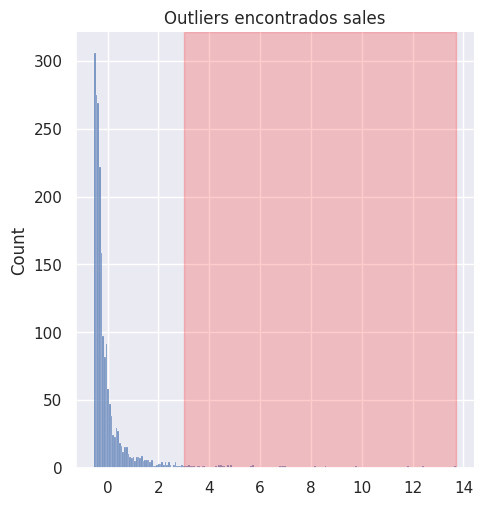

<Figure size 1000x500 with 0 Axes>

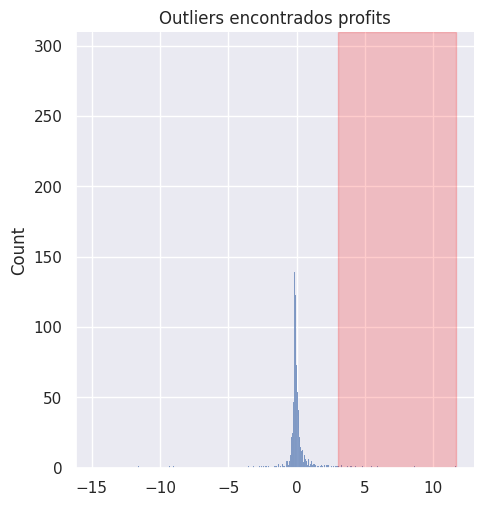

<Figure size 1000x500 with 0 Axes>

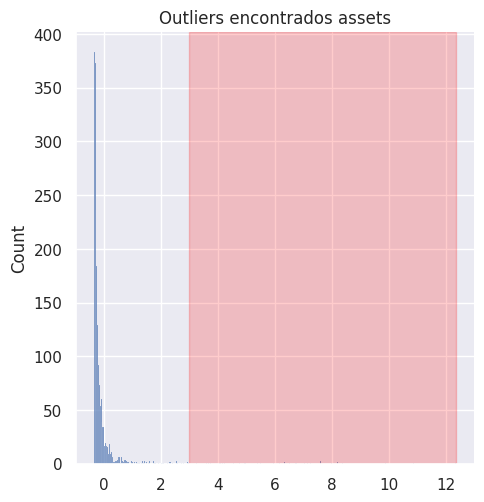

<Figure size 1000x500 with 0 Axes>

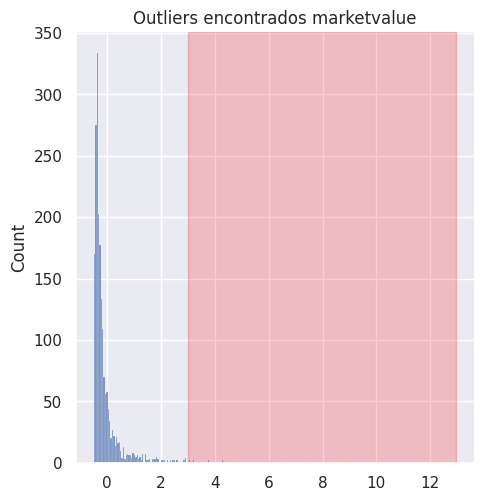

In [ ]:
for column in forbes.select_dtypes(include=np.number).columns:
  zscore, out = find_outlier_zscore(forbes, 3 , column)
  if len(out) > 0:
    plt.figure(figsize = (10,5))
    sns.displot(zscore)
    plt.axvspan(xmin = 3 ,xmax = max(zscore), alpha=0.2, color='red')
    plt.title("Outliers encontrados {}" .format(column))

REMOVER OUTLIERS

In [ ]:
def replace_outlier_zscore(dataset, threshold, colname):
    ## Função que substitui outliers por NaN (valor nulo) se forem encontrados
    df = dataset[colname]
    outliers = []
    zscore = []
    val = []
    threshold = threshold
    mean = np.mean(df)
    std = np.std(df)
    for i in df.values:
        z_score = (i - mean) / std
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
            val.append(np.nan)
        else:
            val.append(i)
    return val

In [ ]:

def drop_outlier(dataset, threshold):
    ## Utiliza a função dropna para remover outliers
    for column in dataset.select_dtypes(include=np.number).columns:
        dataset[column] = replace_outlier_zscore(dataset, threshold, column)
    return dataset.dropna()

In [ ]:
def replace_median_outlier(dataset, threshold):
    ## Utiliza a função fillna para substituir os NaNs pela mediana
    for column in dataset.select_dtypes(include=np.number).columns:
        dataset[column] = replace_outlier_zscore(dataset, threshold, column)
    return dataset.fillna(dataset.median())  # Preenche os NaNs com a mediana da respectiva coluna

In [ ]:
forbes_zscore_na = drop_outlier(forbes, 3)

In [ ]:
forbes_zscore_na_median = replace_median_outlier(forbes, 3)

<ipython-input-5-3cab98940f53>:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return dataset.fillna(dataset.median())  # Preenche os NaNs com a mediana da respectiva coluna


In [ ]:
forbes_zscore_na_median

,rank,name,country,category,sales,profits,assets,marketvalue
1,1,Citigroup,United States,Banking,3.63,0.18,7.42,4.25
2,2,General Electric,United States,Conglomerates,3.63,0.18,7.42,4.25
3,3,American Intl Group,United States,Insurance,3.63,0.18,7.42,4.25
4,4,ExxonMobil,United States,Oil & gas operations,3.63,0.18,7.42,4.25
5,5,BP,United Kingdom,Oil & gas operations,3.63,0.18,7.42,4.25
...,...,...,...,...,...,...,...,...
1996,1996,Siam City Bank,Thailand,Banking,0.48,0.02,11.27,1.47
1997,1997,Yokogawa Electric,Japan,Business services & supplies,2.78,-0.22,2.96,3.29
1998,1998,Hindalco Industries,India,Materials,1.35,0.14,2.47,2.76
1999,1999,Nexans,France,Capital goods,5.09,0.00,2.71,0.88


In [ ]:
#Para verificar se tem valor nulos
forbes.isna().sum ()

rank             0
name             0
country          0
category         0
sales          273
profits        324
assets         302
marketvalue    285
dtype: int64

In [ ]:
import missingno as msno ## pacote de visualizacao de dados faltante

<Axes: >

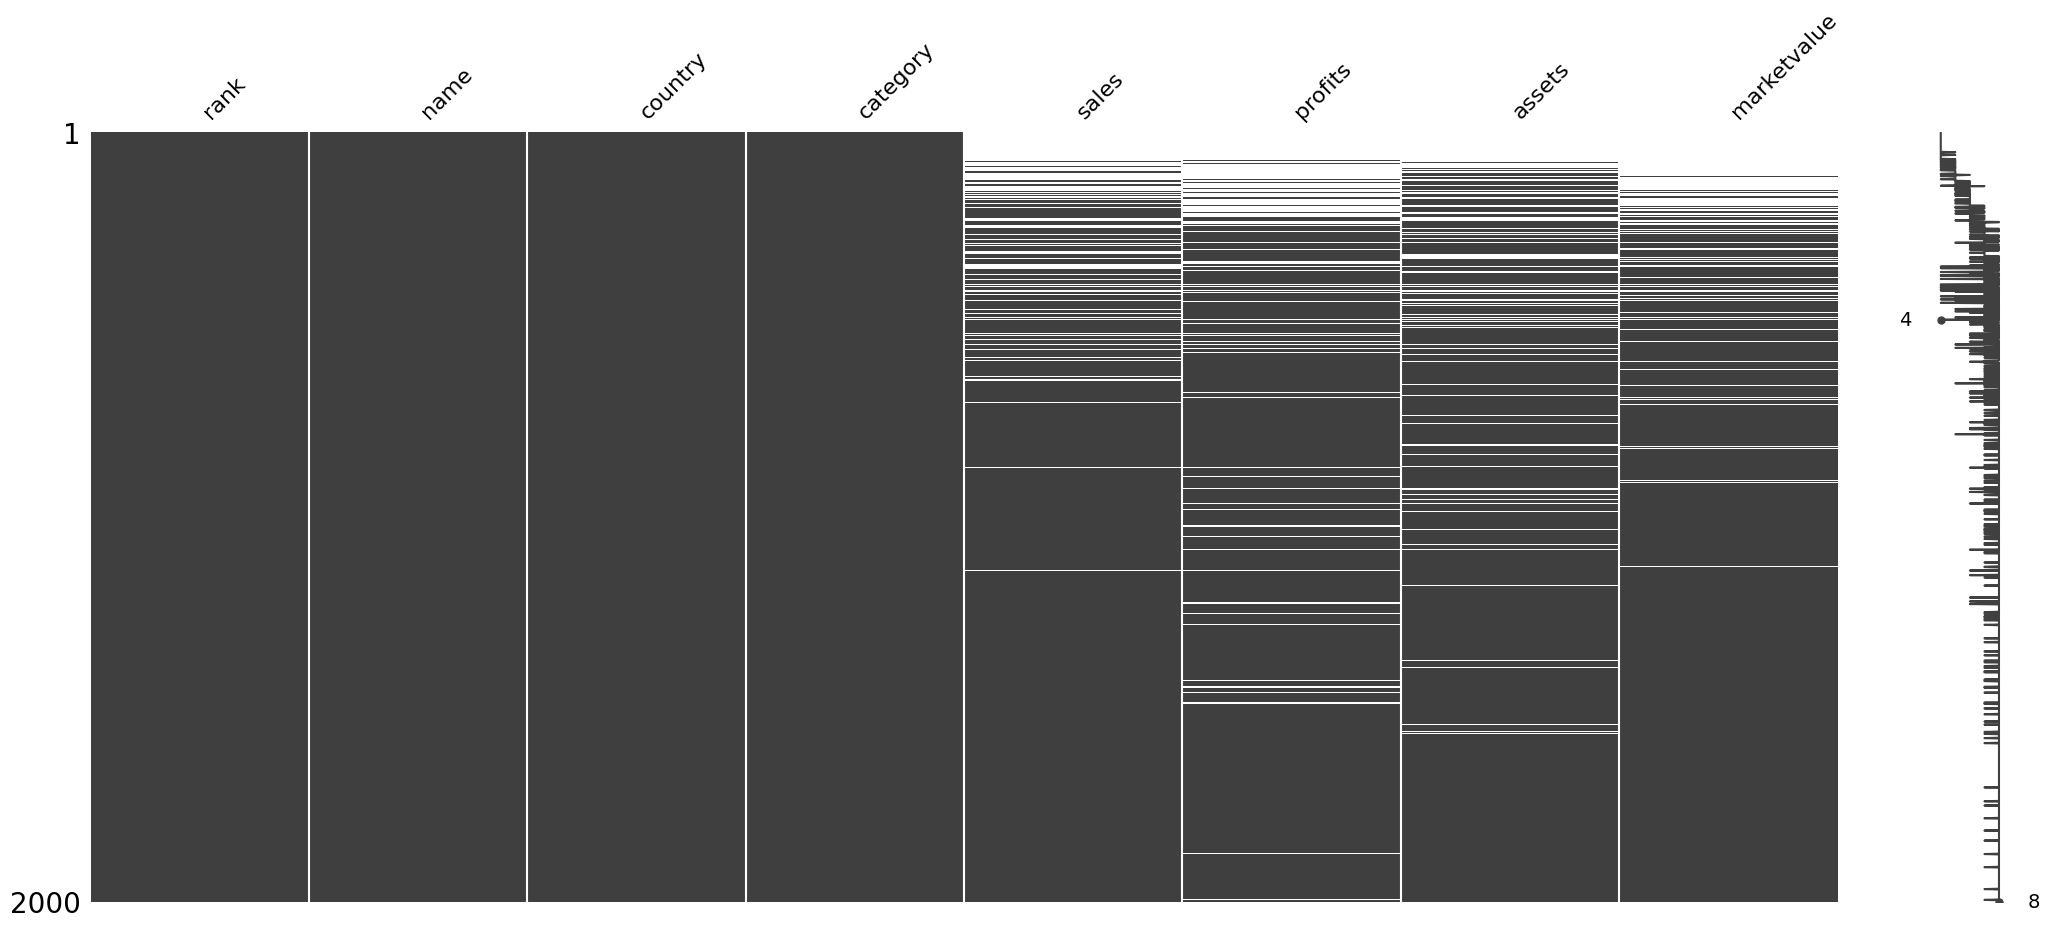

In [ ]:
msno.matrix(forbes) ## essa visualização nos da uma ideia co,pleta dos dados faltantes

In [ ]:
#EDA AUTOMATIZADA#
#pandas profilling -> chamado atualmente de ydataprofilling
#Sweetviz

#Ambas geram relatorios html prontos para analises/interpretaçções do analista

In [ ]:
!pip install sweetviz --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 104.7 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv
my_report = sv.analyze(forbes)

                                             |          | [  0%]   00:00 -> (? left)


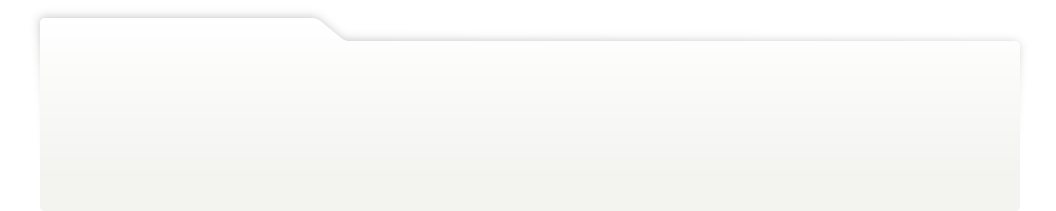
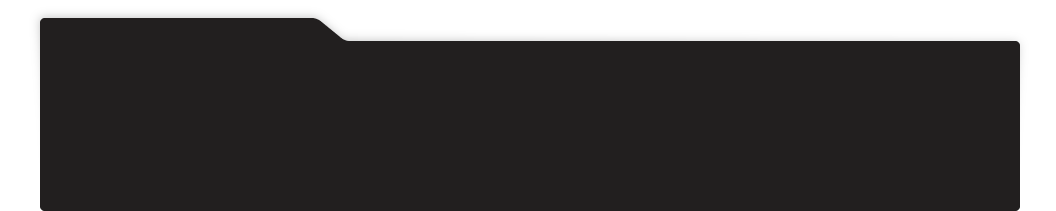
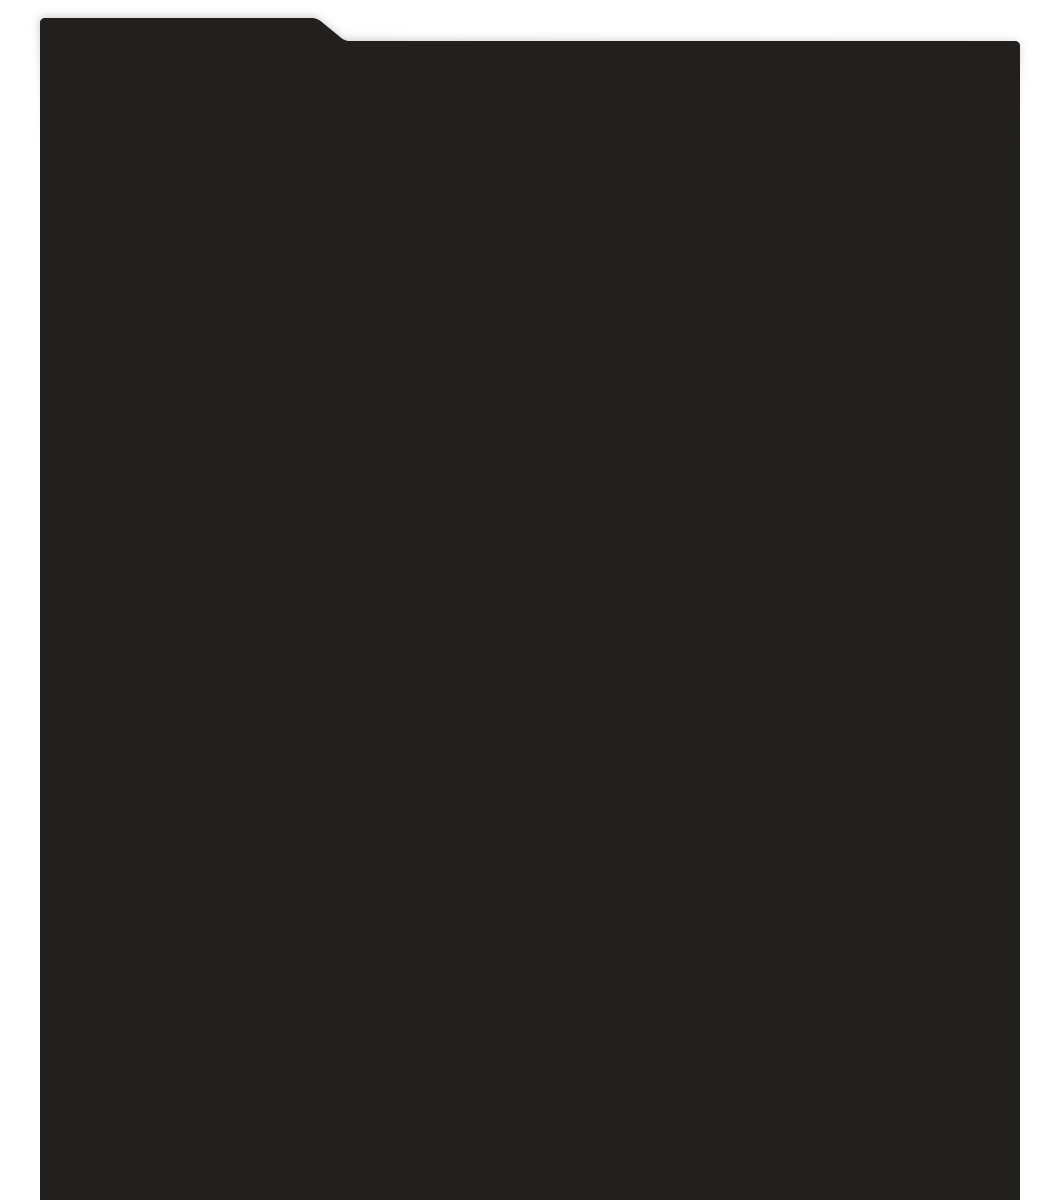
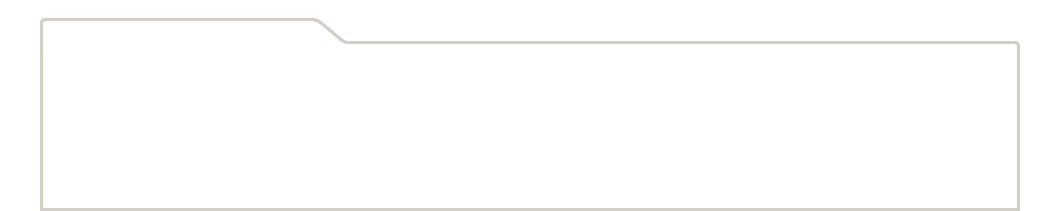
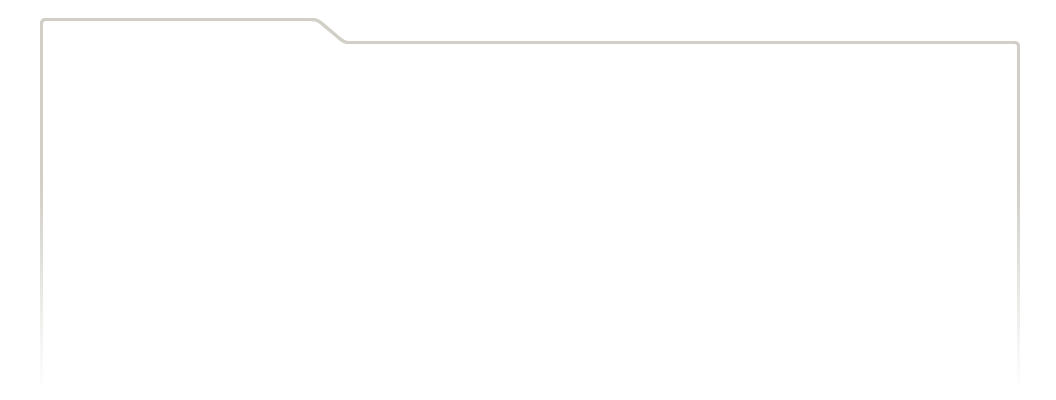
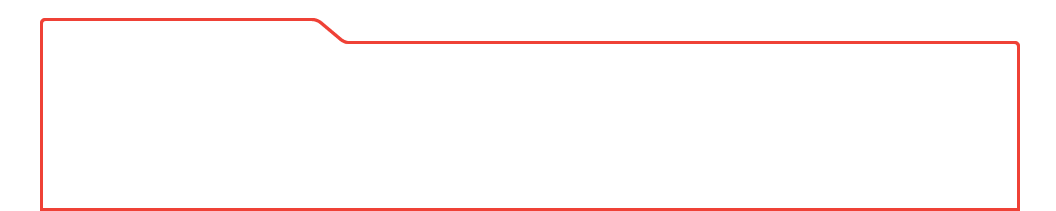
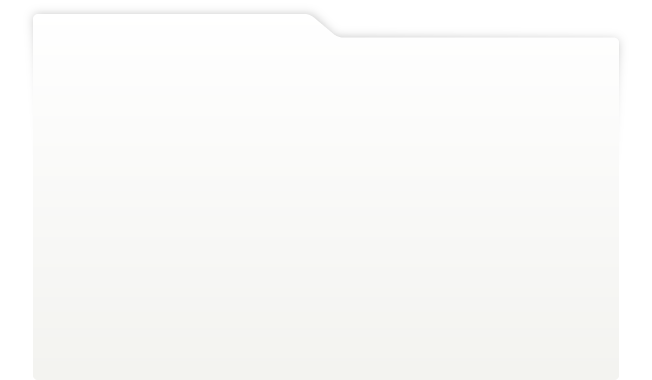
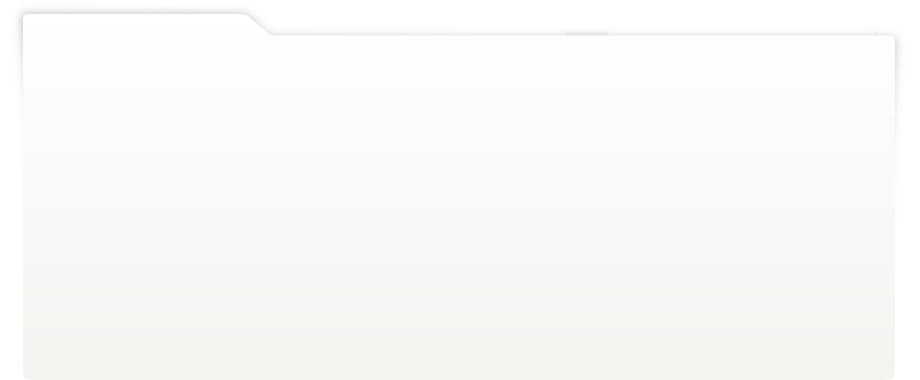
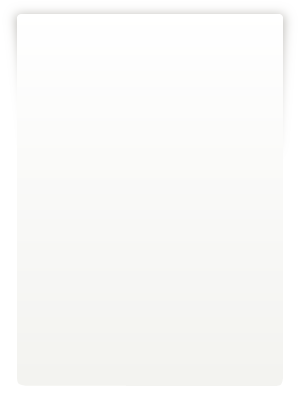
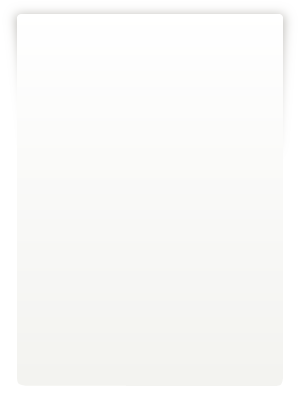
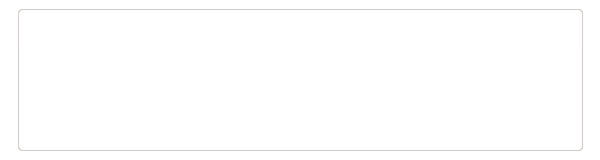
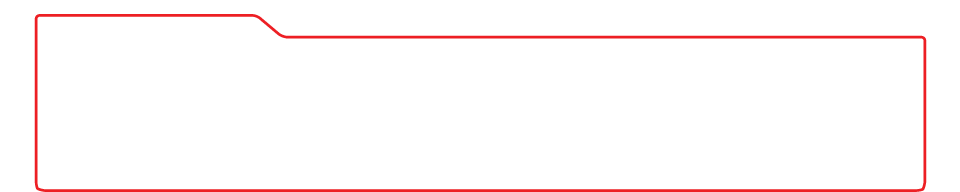
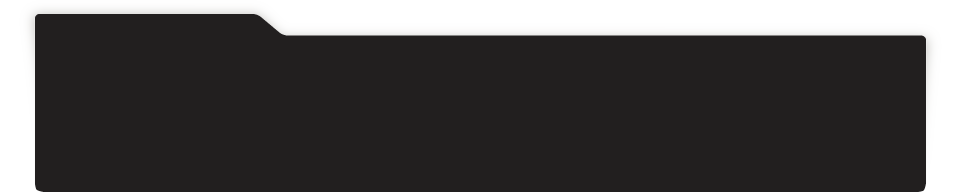
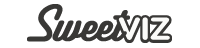
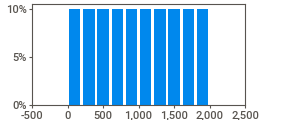
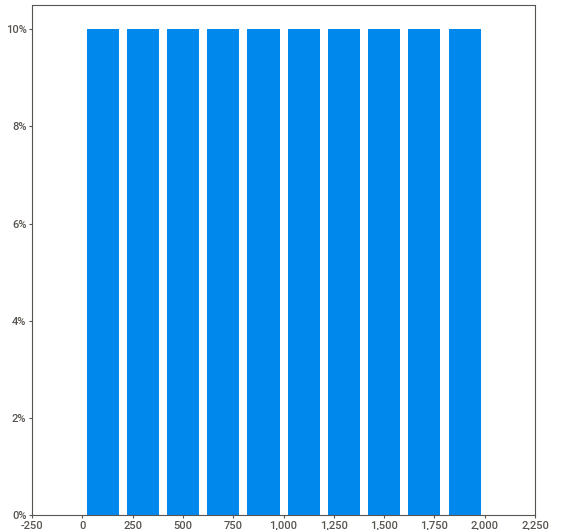
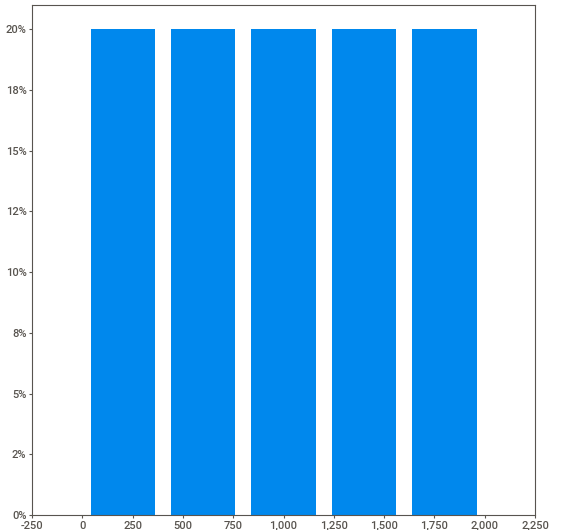
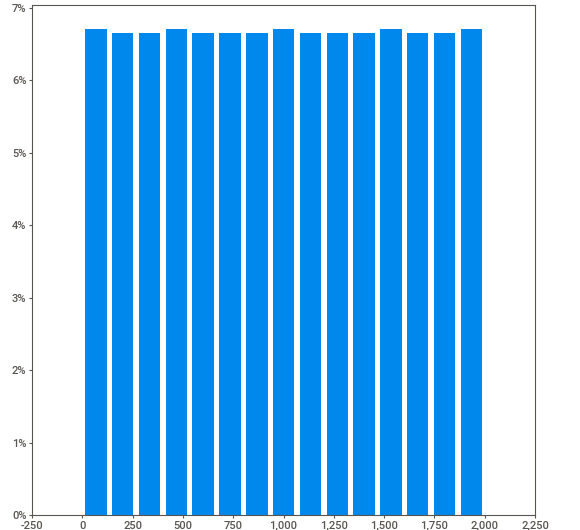
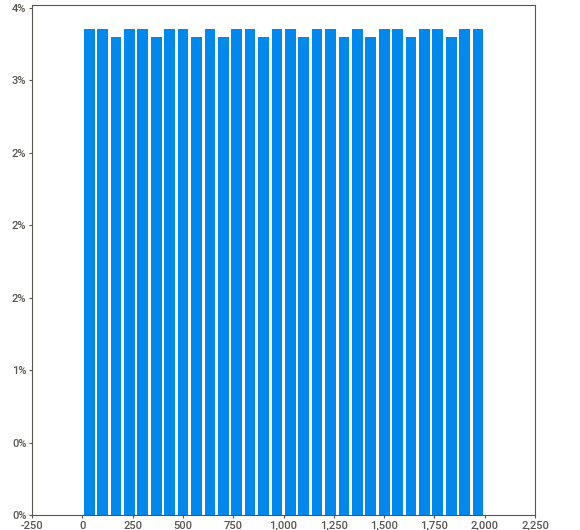
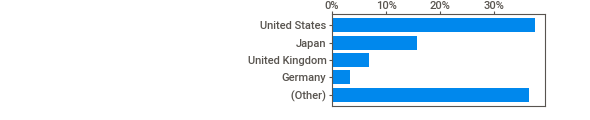
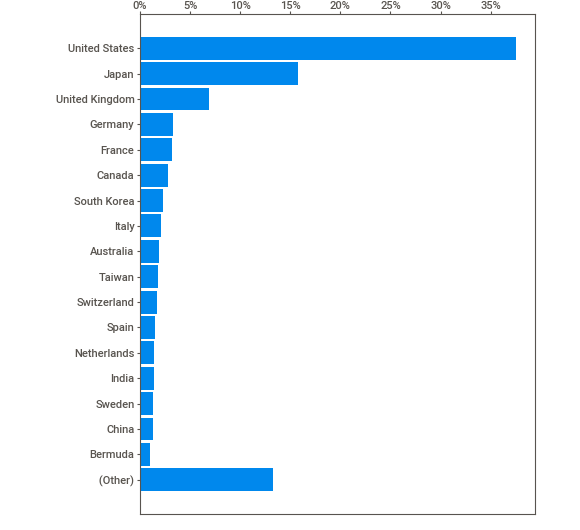
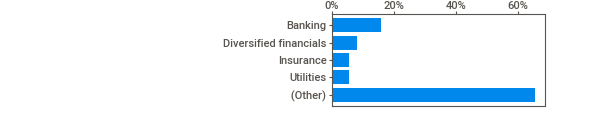
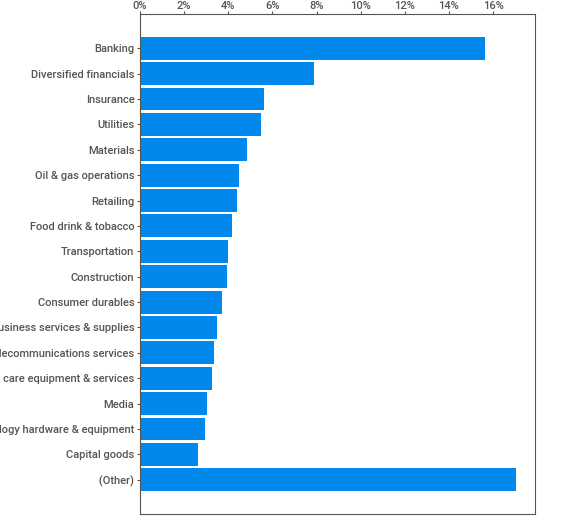
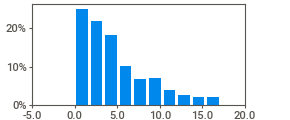
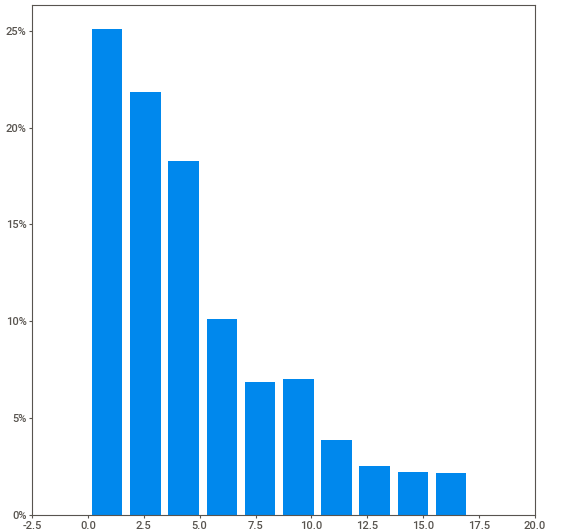
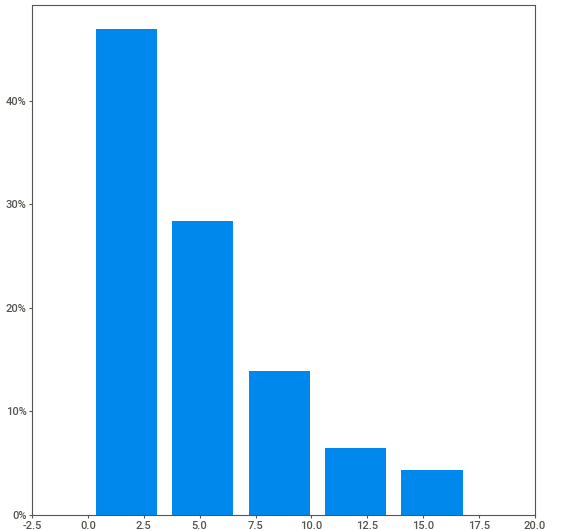
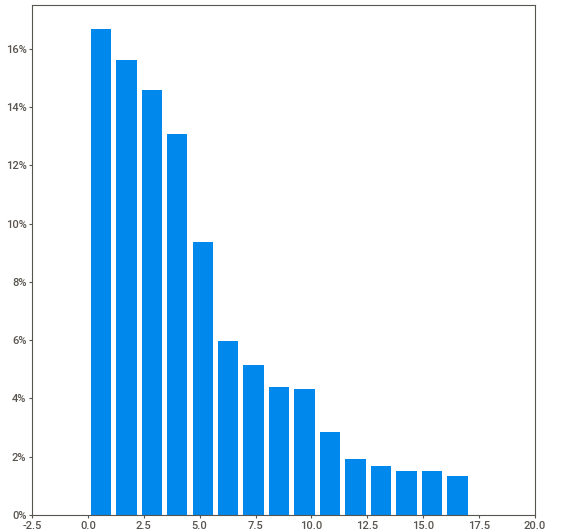
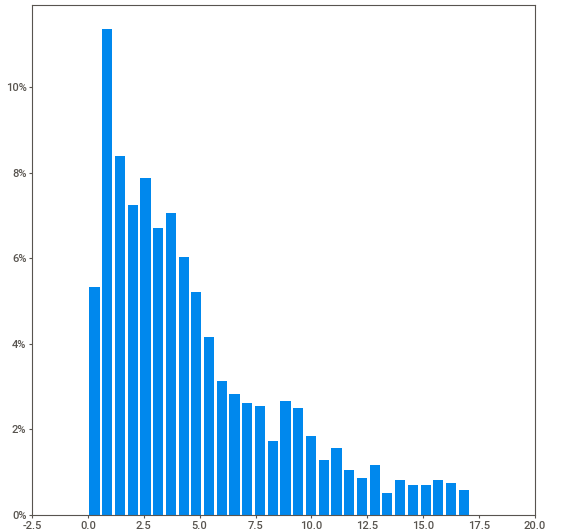
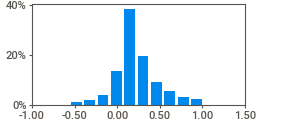
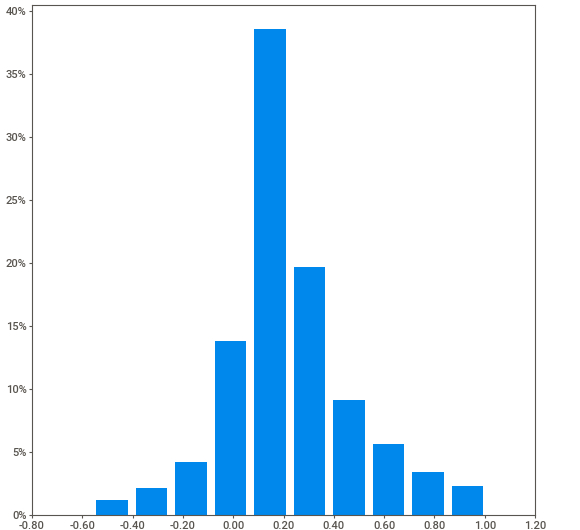
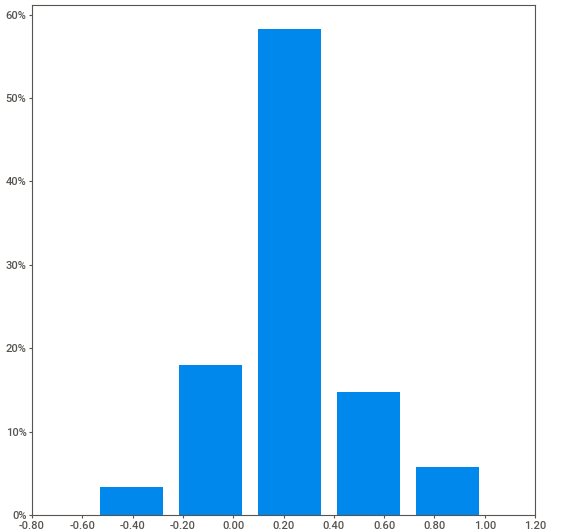
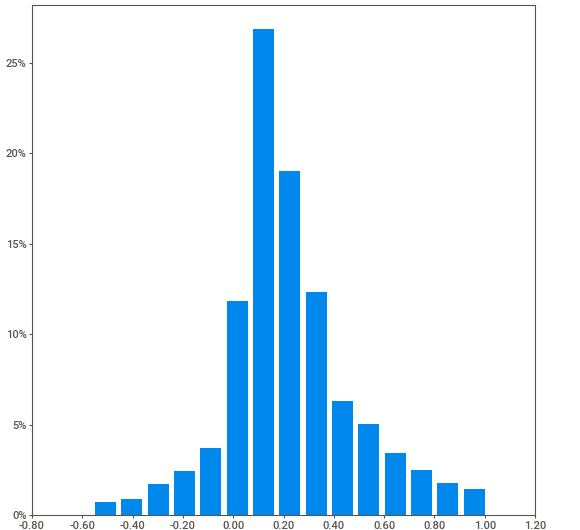
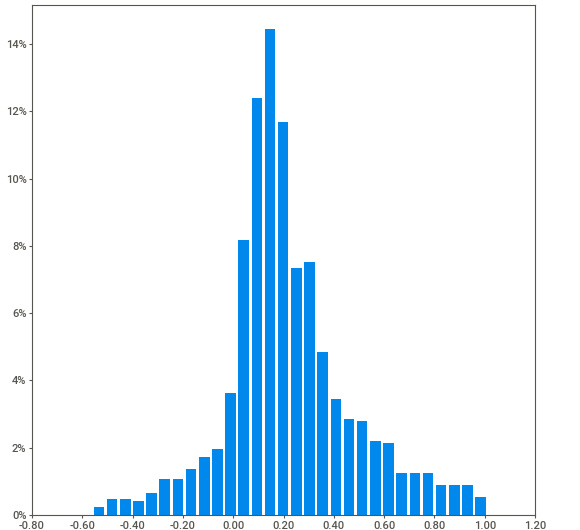
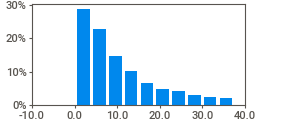
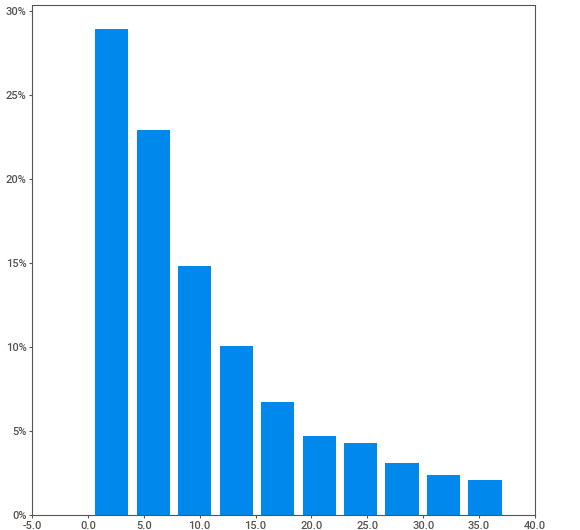
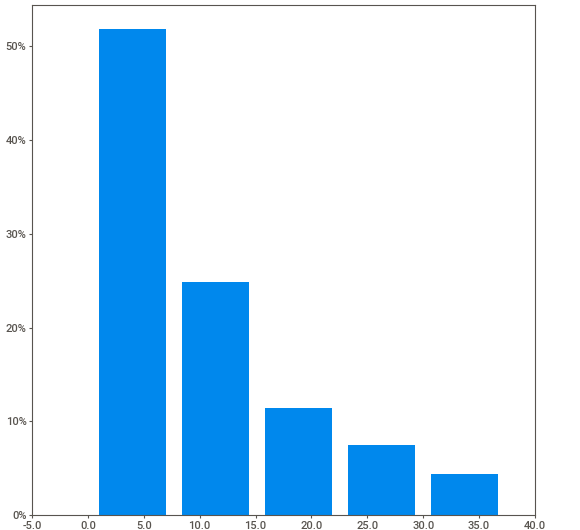
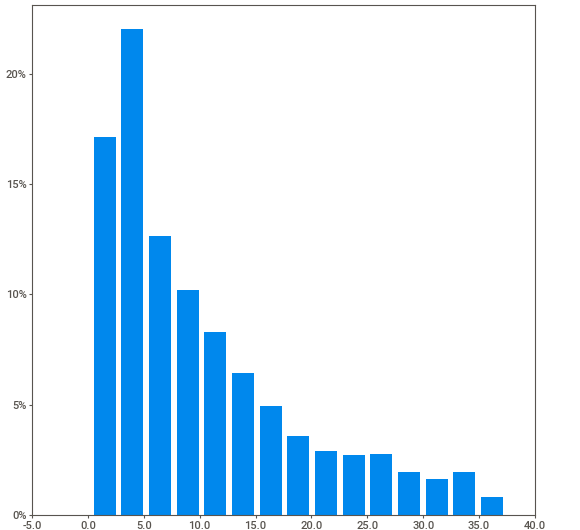
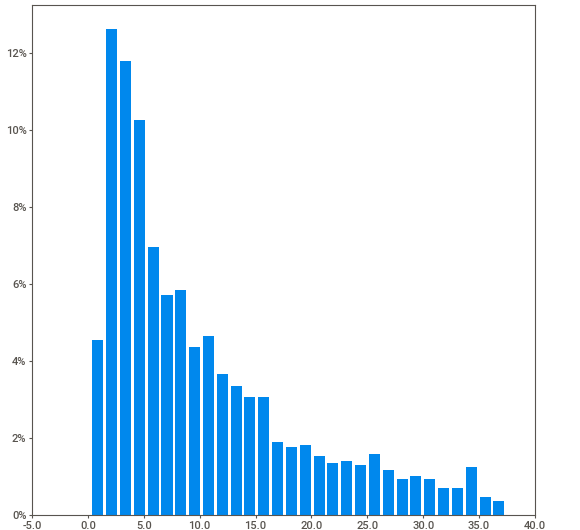
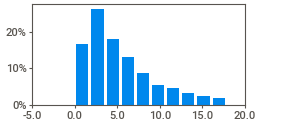
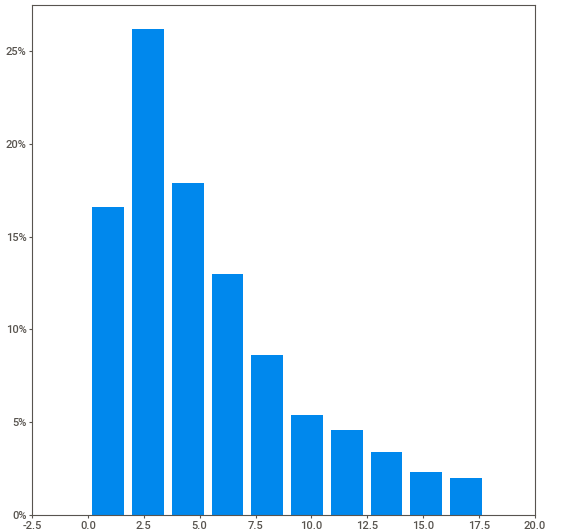
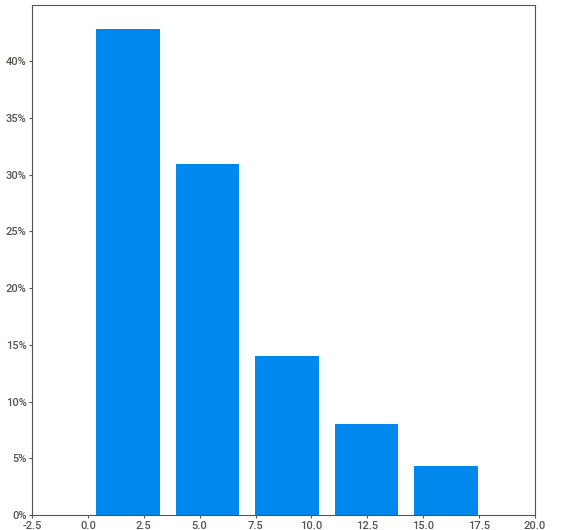
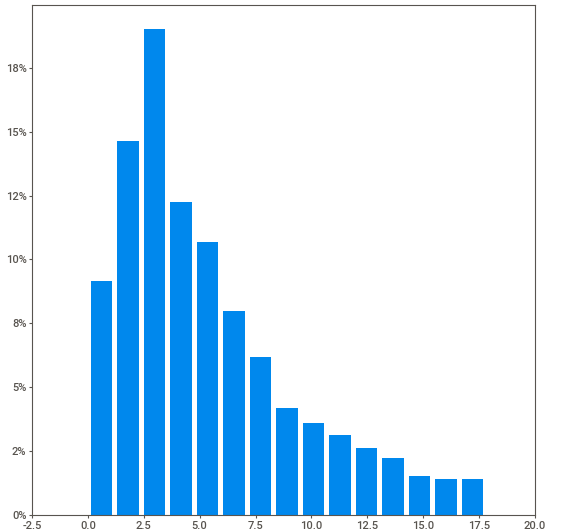
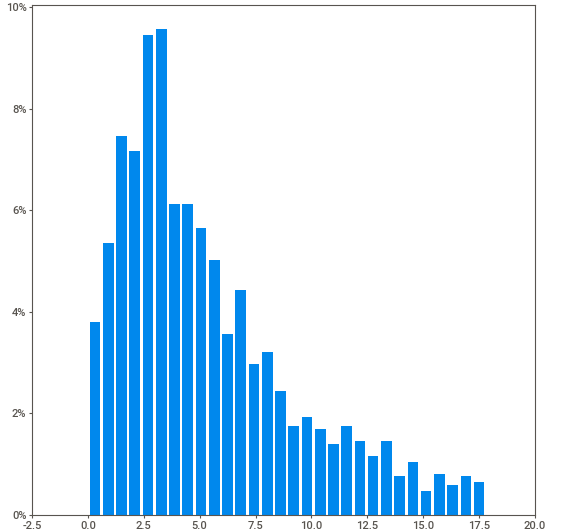
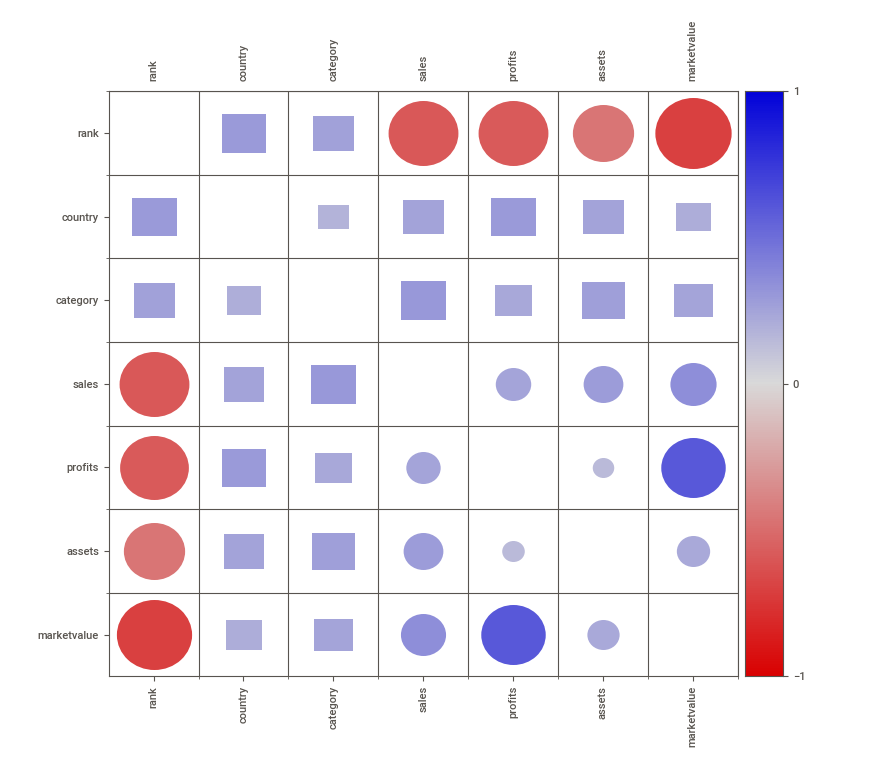
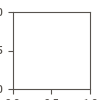

In [ ]:
my_report.show_notebook()

In [ ]:
my_report.show_html(filepath='./SWEETVIZ_REPORT.html',
                    open_browser=True,
                    layout='widescreen',
                    scale=None)

#gera html e salva no seu diretorio

Report ./SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
